<a href="https://colab.research.google.com/github/shubham1894/Hotel-Booking-Exploratory-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### **Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read CSV File

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone/Copy of Hotel Bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(119390, 32)

#### There are Total 119390 Rows and 32 Features present in dataset

### Reading Information about Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

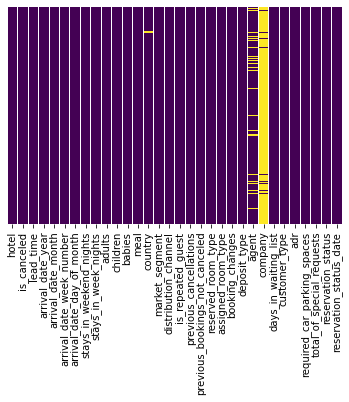

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Observations
1. Null values present in features `children`,`country`,`agent` and `company`.
2. Data type of features such as `children`,`agent` , `reservation_status_date`  and `company` should be change to appropriate data types.

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Finding types of Hotel present in dataset

In [10]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

### Finding Duplicate rows present in dataset

In [11]:
df[df.duplicated()]
print(f"Total duplicate rows present in dataset : {len(df[df.duplicated()])}")

Total duplicate rows present in dataset : 31994


### Now Drop all duplicate rows and considerd only non duplicated values in final_df.

In [12]:
final_df = df[~df.duplicated()].reset_index().drop(['index'], axis = 1)
 
print("Non Duplicate Rows :")
 
# Print the resultant Dataframe
final_df.head()

Non Duplicate Rows :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Data Cleaning**

### Let's find null values present in feature `country`.

In [13]:
final_df['country'].isnull().sum()

452

In [14]:
final_df['country'].nunique()

177

### ***Observations***
- There are Total 452 Null values present in feature ***`country`***.
- There are Total 177 unique countries in feature ***`country`*** 

### ***Solution***
There are Total 452 Null Values of 177 unique values so the best solution to fill those Null Values with other as `OTH` value. 



In [15]:
final_df['country'].fillna('OTH', inplace= True)

### Let's Find null value present in feature `agent`.

In [16]:
final_df['agent'].isnull().sum()

12193

In [17]:
final_df['agent'].nunique()

333

### **Observations:-**
- There are total 12193 null values present in feature **`agent`** and the data type of feature is float
- There are total 334 unique values present in feature **`agent`**

### **Solutions:-**
There are 12193 null value, 334 unique value and the data type is **float** so the best way to fill those value by replacing null values with zero.

In [18]:
final_df['agent'].fillna(0, inplace= True)

### Let's Find the null values present in feature `comapny`

In [19]:
final_df['company'].isnull().sum()

82137

In [20]:
final_df['company'].nunique()

352

### **Observations:-** 
There are total 82137 null values and 353 unique values

### **Solutions:-** 
The best possible way to fill those null values by repalcing null values with zero.

In [21]:
final_df['company'].fillna(0, inplace= True)

### Let's find null values present in `children` 

In [22]:
final_df['children'].isnull().sum()

4

In [23]:
final_df['children'].nunique()

5

### **Observations:-**
There are total 4 null valules and 5 unique values present in feature children

### **Solutions:-** 
The best way to fill those null values is by filling mode of the feature because it has only 4 null values and the data type of the feature is float.

In [24]:
children_mode = final_df['children'].mode()[0]
children_mode

0.0

In [25]:
final_df['children'].fillna(value=children_mode, inplace=True)

### Let's Convert features into appropriate data type
- Convert Data Type of features *`children`*, *`company`*, *`agent`* from float data type to integer data type.
- Convert Data Type of feature *`reservation_status_date`* from object data type into DateTime data type.


#### Using dictionary to convert specific columns

In [26]:
convert_dict = {'children': int,
                'company': int,
                'agent' : int
                }
final_df = final_df.astype(convert_dict)

#### Converting the string to datetime format

In [27]:
final_df['reservation_status_date'] = final_df['reservation_status_date'].astype('datetime64[ns]')

In [28]:
final_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02


### Now check the info of the final dataframe after of filling those null values

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  ba

In [47]:
import plotly.express as px
fig = px.histogram(final_df, x='adr')

fig.show()

In [48]:
fig = px.box(final_df, y= 'adr')

fig.show()